In [1]:
import pandas as pd
#Converting text into numerical data
from sklearn.preprocessing import LabelEncoder
#For Decision Tree
from sklearn.tree import DecisionTreeRegressor
#SVR
from sklearn.svm import SVR
#Random Forest
from sklearn.ensemble import RandomForestRegressor
#XG Boost
!pip install xgboost
from xgboost import XGBRegressor

In [2]:
df=pd.read_csv("PizzaDetails.csv")
df.head()

,company,price_cad,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,29,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,25,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,19,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,22,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,30,18.0,mozzarella,double_signature,jumbo,yes,no,yes


In [3]:
inputs=df.drop('price_cad',axis='columns')
target=df['price_cad']

In [4]:
#Preprocessing (Label Encoding)
columns = ['company', 'topping', 'variant', 'size', 'extra_sauce', 'extra_cheese', 'extra_mushrooms']
new_columns = ['company_new', 'topping_new', 'variant_new', 'size_new', 'sauce_new', 'cheese_new', 'mushroom_new']
label_encoders = {}

for i in range(len(columns)):
    col = columns[i]
    new_col = new_columns[i]
    le = LabelEncoder()
    inputs[new_col] = le.fit_transform(inputs[col])
    label_encoders[col] = le
inputs=inputs.drop(columns,axis='columns')
inputs.head()

,diameter,company_new,topping_new,variant_new,size_new,sauce_new,cheese_new,mushroom_new
0,22.0,0,2,8,1,1,1,0
1,20.0,0,7,8,1,1,1,0
2,16.0,0,5,8,4,1,1,1
3,14.0,0,9,8,4,1,0,1
4,18.0,0,4,8,1,1,0,1


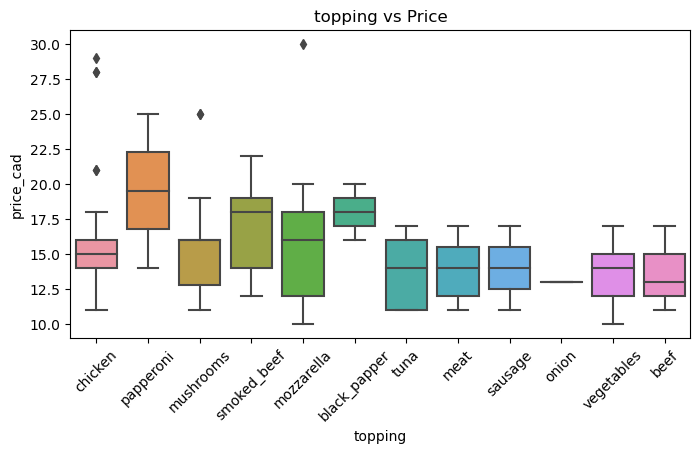

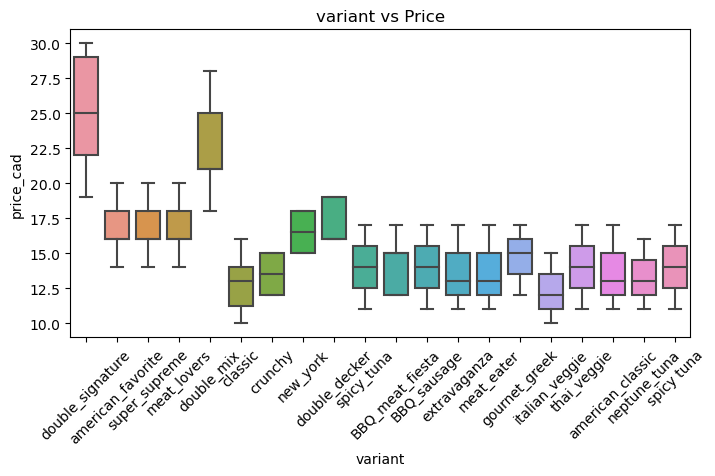

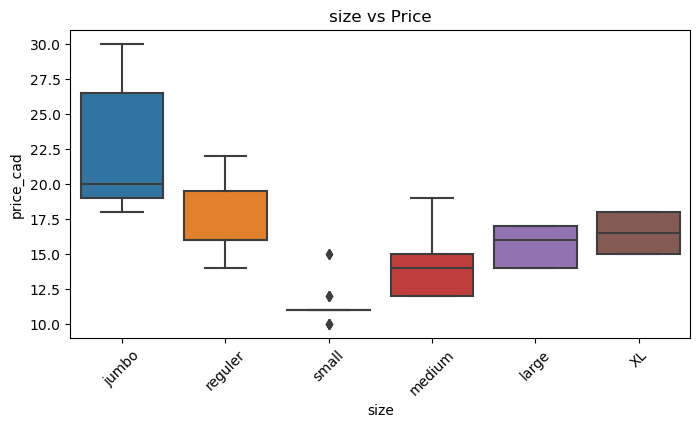

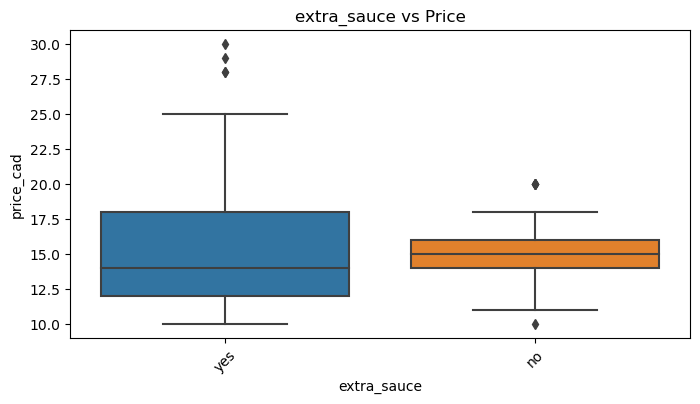

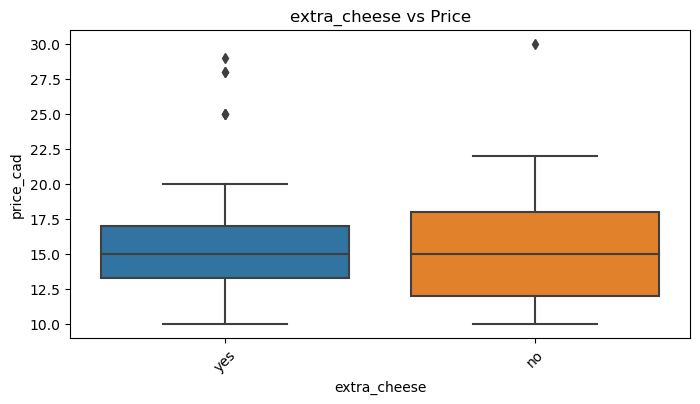

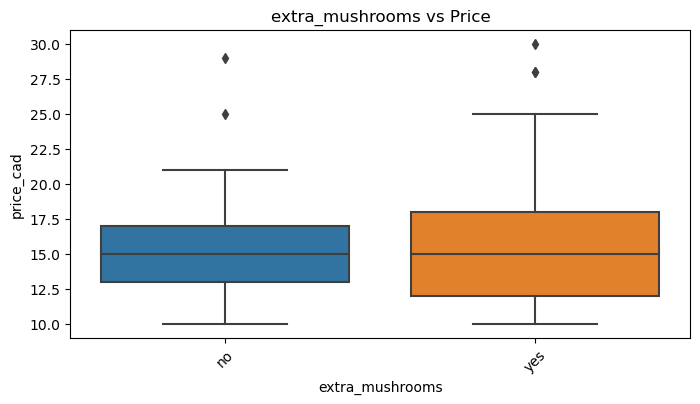

In [5]:
#EDA (box plots)
import matplotlib.pyplot as plt
import seaborn as sns #Library for statistical visualizations
for col in ['topping', 'variant', 'size', 'extra_sauce', 'extra_cheese', 'extra_mushrooms']:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col], y=df['price_cad'])
    plt.title(f"{col} vs Price")
    plt.xticks(rotation=45)
    plt.show()


In [6]:
#Decision Tree
from sklearn.model_selection import train_test_split
trainX,valX,trainY,valY=train_test_split(inputs,target,random_state=0)
modelD=DecisionTreeRegressor()
modelD.fit(trainX,trainY)

DecisionTreeRegressor()

In [7]:
#Metrics(MAE & MSE)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
val_prediction1=modelD.predict(valX)
print(f'Mean Absolute Error:{mean_absolute_error(valY,val_prediction1)}')
print(f'Mean Squared Error:{mean_squared_error(valY,val_prediction1)}')

Mean Absolute Error:0.9393939393939394
Mean Squared Error:2.757575757575758


In [8]:
#SVM(SVR)
modelS=SVR(kernel='rbf')
modelS.fit(trainX,trainY)

SVR()

In [9]:
#Metrics(MAE & MSE)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
val_prediction2=modelS.predict(valX)
print(f'Mean Absolute Error:{mean_absolute_error(valY,val_prediction2)}')
print(f'Mean Squared Error:{mean_squared_error(valY,val_prediction2)}')

Mean Absolute Error:1.6087524071226498
Mean Squared Error:3.638986379348936


In [10]:
#Random Forest
modelR=RandomForestRegressor(random_state=42)
modelR.fit(trainX,trainY)

RandomForestRegressor(random_state=42)

In [11]:
#Metrics(MAE & MSE)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
val_prediction3=modelR.predict(valX)
print(f'Mean Absolute Error:{mean_absolute_error(valY,val_prediction3)}')
print(f'Mean Squared Error:{mean_squared_error(valY,val_prediction3)}')

Mean Absolute Error:0.9457575757575758
Mean Squared Error:1.589469696969697


In [12]:
#XG Boost
modelX = XGBRegressor(random_state=42)
modelX.fit(trainX,trainY)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [63]:
#Metrics(MAE & MSE)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
val_prediction4=modelX.predict(valX)
print(f'Mean Absolute Error:{mean_absolute_error(valY,val_prediction4)}')
print(f'Mean Squared Error:{mean_squared_error(valY,val_prediction4)}')

Mean Absolute Error:0.6754426378192324
Mean Squared Error:0.808413493054297


In [24]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
#Using Grid Search to find the best combination of hyperparamters
#Decision tree
modelD_New=GridSearchCV(modelD,{'max_depth':[10,20,30],'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,4]},cv=5,return_train_score=False)
modelD_New.fit(trainX,trainY)
modelD_New.cv_results_
df1=pd.DataFrame(modelD_New.cv_results_)
df1.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002124,0.002606,0.001384,0.002223,10,1,2,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.410596,0.925319,0.791472,0.915088,0.938988,0.796292,0.199954,4
1,0.000000,0.000000,0.003116,0.003894,10,1,5,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.567697,0.843843,0.799804,0.902233,0.839792,0.790674,0.116178,7
2,0.001928,0.003855,0.001371,0.002135,10,1,10,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.210670,0.755529,0.815858,0.774957,0.866757,0.684754,0.240089,22
3,0.001841,0.003158,0.000000,0.000000,10,2,2,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",0.544886,0.863777,0.803911,0.938674,0.822346,0.794719,0.133234,5
4,0.003193,0.003910,0.000237,0.000474,10,2,5,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",0.539551,0.843281,0.801988,0.950539,0.835805,0.794233,0.136739,6


In [25]:
#SVR
modelS_New=GridSearchCV(modelS,{'kernel': ['linear', 'rbf'],'epsilon': [0.1, 0.2, 0.5],'gamma': ['scale', 'auto']},cv=5,return_train_score=False)
modelS_New.fit(trainX,trainY)
modelS_New.cv_results_
df2=pd.DataFrame(modelS_New.cv_results_)
df2.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_epsilon,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003617,0.002976,0.002090,0.004179,0.1,scale,linear,"{'epsilon': 0.1, 'gamma': 'scale', 'kernel': '...",0.619431,0.714434,0.866727,0.709817,0.508071,0.683696,0.118407,3
1,0.001239,0.001582,0.003098,0.006197,0.1,scale,rbf,"{'epsilon': 0.1, 'gamma': 'scale', 'kernel': '...",0.492400,0.436315,0.615432,0.576905,0.448545,0.513919,0.070755,7
2,0.005434,0.006601,0.000000,0.000000,0.1,auto,linear,"{'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'l...",0.619431,0.714434,0.866727,0.709817,0.508071,0.683696,0.118407,3
3,0.002666,0.004699,0.000237,0.000474,0.1,auto,rbf,"{'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'r...",0.299131,0.054124,0.224872,0.180078,0.183154,0.188272,0.079647,12
4,0.004369,0.004147,0.000801,0.000981,0.2,scale,linear,"{'epsilon': 0.2, 'gamma': 'scale', 'kernel': '...",0.617711,0.707989,0.872710,0.699075,0.500243,0.679546,0.122046,5


In [28]:
#Random Forest
modelR_New=GridSearchCV(modelR,{'n_estimators': [100,200,300],'min_samples_leaf':[1,2,4]},cv=5,return_train_score=False)
modelR_New.fit(trainX,trainY)
modelR_New.cv_results_
df3=pd.DataFrame(modelR_New.cv_results_)
df3.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.101666,0.007277,0.002848,0.005695,1,100,"{'min_samples_leaf': 1, 'n_estimators': 100}",0.622579,0.870849,0.907353,0.860486,0.864619,0.825177,0.102652,3
1,0.200870,0.007401,0.005947,0.003555,1,200,"{'min_samples_leaf': 1, 'n_estimators': 200}",0.629580,0.875341,0.905936,0.856085,0.859403,0.825269,0.099421,2
2,0.305276,0.004286,0.008025,0.006878,1,300,"{'min_samples_leaf': 1, 'n_estimators': 300}",0.622734,0.878721,0.908941,0.860180,0.861948,0.826505,0.103378,1
3,0.096543,0.007343,0.006308,0.004739,2,100,"{'min_samples_leaf': 2, 'n_estimators': 100}",0.593307,0.869159,0.895231,0.856081,0.802294,0.803215,0.109245,4
4,0.192133,0.005325,0.003419,0.004486,2,200,"{'min_samples_leaf': 2, 'n_estimators': 200}",0.593608,0.872097,0.896083,0.844763,0.802271,0.801765,0.108647,5


In [29]:
#XG Boost
modelX_New=GridSearchCV(modelX,{'n_estimators':[100,200],'max_depth':[6,10],'learning_rate':[0.01,0.1,]},cv=5,return_train_score=False)
modelX_New.fit(trainX,trainY)
modelX_New.cv_results_
df4=pd.DataFrame(modelX_New.cv_results_)
df4.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.048458,0.020389,0.004934,1.460388e-03,0.01,6,100,"{'learning_rate': 0.01, 'max_depth': 6, 'n_est...",0.475775,0.369065,0.721035,0.658584,0.662805,0.577453,0.132851,7
1,0.071225,0.003942,0.004003,9.368364e-07,0.01,6,200,"{'learning_rate': 0.01, 'max_depth': 6, 'n_est...",0.560982,0.511760,0.881312,0.840130,0.750296,0.708896,0.147922,5
2,0.047437,0.002709,0.003104,9.182505e-04,0.01,10,100,"{'learning_rate': 0.01, 'max_depth': 10, 'n_es...",0.419799,0.371697,0.694523,0.646856,0.663899,0.559355,0.135313,8
3,0.091890,0.006904,0.003953,1.062517e-04,0.01,10,200,"{'learning_rate': 0.01, 'max_depth': 10, 'n_es...",0.473885,0.519376,0.839176,0.822732,0.740869,0.679208,0.153424,6
4,0.043262,0.004200,0.002803,9.806985e-04,0.1,6,100,"{'learning_rate': 0.1, 'max_depth': 6, 'n_esti...",0.599356,0.635631,0.913149,0.879507,0.767295,0.758987,0.125745,2
